In [1]:
# Required Imports
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline, lagrange
from scipy.integrate import quadrature
from scipy.misc import derivative
from scipy import interpolate

### Q1

In [2]:
def langrange_interpolation(val, x, fx):
    N = len(x)
    result = 0
    for i in range(0,N):
        prod = 1 
        for j in range(0,N):
            if (j!=i):
                prod *= (val - x[j])/(x[i] - x[j])
        result += prod*fx[i]
    return result

In [3]:
x = np.array([0,3,5,7,13])
fx = np.array([-7,6,-1,11,18])

cs = CubicSpline(x, fx)

print("Results Lagrange:")
print("y(2)= ",langrange_interpolation(2, x, fx) )
print("y(9)= ",langrange_interpolation(9, x, fx) )
print("\nResults CubicSpline:")
print("y(2)= ",cs(2.0))
print("y(2)= ",cs(9.0))

Results Lagrange:
y(2)=  10.165521978021976
y(9)=  40.416483516483524

Results CubicSpline:
y(2)=  9.153301886792452
y(2)=  31.338993710691824


### Q2

In [4]:
def gaussian(x,mu,sigma):
    return np.exp((-(x-mu)**2)/(2*sigma**2))*math.sqrt(1/(2*math.pi*sigma))

x = np.linspace(-4,4,10)
y = gaussian(x, 0.0, 1.0)

cs = CubicSpline(x,y)
x_i = np.linspace(-4,4,1000)

y_g = gaussian(x_i, 0.0, 1.0)
y_cs = cs(x_i)
y_l = langrange_interpolation(x_i, x, y)

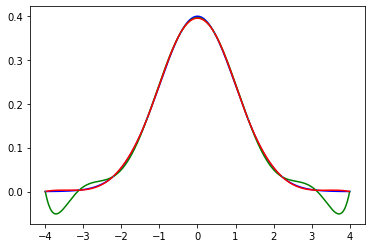

In [5]:
plt.plot(x_i,y_g, color='b')
plt.plot(x_i,y_l, color='g')
plt.plot(x_i,y_cs, color='r')
plt.plot(x,y,",")
plt.show()

#### Inferences

- The lagrange interpolation got distorted at the edges as bisection takes points on either side of the value and hence there are no values to fit on edges.
- As we can see the CubicSpline gave the best fit as compared to all other methods.
- Therefore, I would like to choose the CubicSpline interpolation over Guassian and Lagrange interpolations.

### Q3 

In [6]:
def f(x):
    return (x-2)**3 - (3.5*x) + 8

def df(x):
    return 3*(x-2)**2 - 3.5

def F(a, b):
    def integral(x):
        return (x-2)**4 + (8*x) - (7/4)*(x**2)

    return integral(b) - integral(a)

def central_diff(x):
    def f(x):
        return (x-2)**3 - (3.5*x) + 8
    h = 0.001
    return (f(x+h) - f(x))/h 

### Q4

In [7]:
x = [0, 1, 2, 3, 4]
fx = list(map(f, x))

cs = CubicSpline(x, fx)

### Q5

In [8]:
exactF = F(0, 4)
guasF, gausErr = quadrature(cs, 0, 4)

print(f"Integral using our function: {exactF}")
print(f"Integral using Guassian Quadrature function: {guasF}")

Integral using our function: 4.0
Integral using Guassian Quadrature function: 3.9999999999999996


### Q6

In [9]:
exact_df = list(map(df, x))
central_df = [derivative(cs, val, dx = 0.001) for val in x] 

print(f"Exact Derivative:\n{exact_df}")
print(f"\nCentral Difference Derivative:\n{central_df}")      

Exact Derivative:
[8.5, -0.5, -3.5, -0.5, 8.5]

Central Difference Derivative:
[8.500001, -0.4999989999998622, -3.4999989999994763, -0.4999989999999732, 8.500001000000923]


### Q7

In [10]:
points = np.linspace(0, 4, 50)

exact_f = np.array(list(map(f, points)))
cs_f = np.array([i for i in list(map(cs, points))])

lg = lagrange(x, fx)
l_f = np.array(list(map(lg, points)))

In [11]:
cs_f

array([ 0.        ,  0.6544382 ,  1.23217367,  1.73647035,  2.17059219,
        2.53780313,  2.84136712,  3.0845481 ,  3.27061003,  3.40281685,
        3.48443251,  3.51872094,  3.5089461 ,  3.45837194,  3.37026239,
        3.24788141,  3.09449294,  2.91336093,  2.70774932,  2.48092206,
        2.2361431 ,  1.97667638,  1.70578585,  1.42673546,  1.14278914,
        0.85721086,  0.57326454,  0.29421415,  0.02332362, -0.2361431 ,
       -0.48092206, -0.70774932, -0.91336093, -1.09449294, -1.24788141,
       -1.37026239, -1.45837194, -1.5089461 , -1.51872094, -1.48443251,
       -1.40281685, -1.27061003, -1.0845481 , -0.84136712, -0.53780313,
       -0.17059219,  0.26352965,  0.76782633,  1.3455618 ,  2.        ])

In [12]:
exact_f

array([ 0.        ,  0.6544382 ,  1.23217367,  1.73647035,  2.17059219,
        2.53780313,  2.84136712,  3.0845481 ,  3.27061003,  3.40281685,
        3.48443251,  3.51872094,  3.5089461 ,  3.45837194,  3.37026239,
        3.24788141,  3.09449294,  2.91336093,  2.70774932,  2.48092206,
        2.2361431 ,  1.97667638,  1.70578585,  1.42673546,  1.14278914,
        0.85721086,  0.57326454,  0.29421415,  0.02332362, -0.2361431 ,
       -0.48092206, -0.70774932, -0.91336093, -1.09449294, -1.24788141,
       -1.37026239, -1.45837194, -1.5089461 , -1.51872094, -1.48443251,
       -1.40281685, -1.27061003, -1.0845481 , -0.84136712, -0.53780313,
       -0.17059219,  0.26352965,  0.76782633,  1.3455618 ,  2.        ])

In [13]:
l_f

array([ 0.        ,  0.6544382 ,  1.23217367,  1.73647035,  2.17059219,
        2.53780313,  2.84136712,  3.0845481 ,  3.27061003,  3.40281685,
        3.48443251,  3.51872094,  3.5089461 ,  3.45837194,  3.37026239,
        3.24788141,  3.09449294,  2.91336093,  2.70774932,  2.48092206,
        2.2361431 ,  1.97667638,  1.70578585,  1.42673546,  1.14278914,
        0.85721086,  0.57326454,  0.29421415,  0.02332362, -0.2361431 ,
       -0.48092206, -0.70774932, -0.91336093, -1.09449294, -1.24788141,
       -1.37026239, -1.45837194, -1.5089461 , -1.51872094, -1.48443251,
       -1.40281685, -1.27061003, -1.0845481 , -0.84136712, -0.53780313,
       -0.17059219,  0.26352965,  0.76782633,  1.3455618 ,  2.        ])

- As we can see we are getting the same values for the function using Lagrange Interpolation and CubicSpline Interpolation which fully resembles with expected output of the actual function.